<a href="https://colab.research.google.com/github/prynshus/Deep-learning-/blob/main/ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import torch
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:

import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor


import matplotlib.pyplot as plt

In [ ]:
train_data=datasets.FashionMNIST(root="data",train=True,download=True, transform=ToTensor(),target_transform=None)


test_data=datasets.FashionMNIST(root="data",train=False, download=True,transform=ToTensor())

100%|██████████| 26421880/26421880 [00:02<00:00, 12088145.38it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 204425.01it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3795643.58it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6537171.36it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



(-0.5, 27.5, 27.5, -0.5)

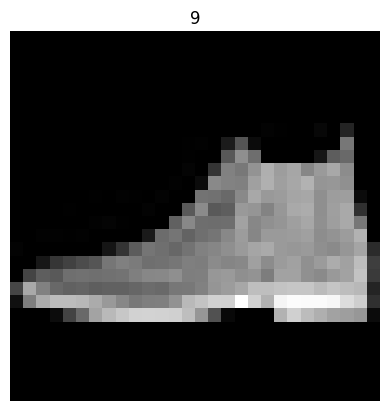

In [ ]:
image, label=test_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32 #hyperparameter
train_dataloader=DataLoader(train_data,BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(test_data,BATCH_SIZE, shuffle=False)

In [ ]:
class FashionMNISTModel(nn.Module):
      def __init__(self, input, output, hidden_units):
         super().__init__()
         self.first_block=nn.Sequential(
                           nn.Flatten(),
                           nn.Linear(in_features=input,out_features=hidden_units),
                           nn.ReLU(),
                           nn.Linear(in_features=hidden_units,out_features=output)
                           )

      def forward(self,x):
          return self.first_block(x)

In [ ]:

model_0= FashionMNISTModel(input=784, output=10,hidden_units=10)

In [ ]:

from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [ ]:

from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:

class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
#defining a function that evaluates a model and prints loss graph

def testingLoop(model, test_dataloader, loss_fn):
    test_loss=0
    test_acc=0
    model.eval()
    model.to(device)
    with torch.inference_mode():
         for batch, (X,y) in enumerate(test_dataloader):
             X=X.to(device)
             y=y.to(device)
             y_preds=model(X)
             test_loss+=loss_fn(y_preds,y)
             test_acc+=accuracy_fn(y,y_preds.argmax(dim=1))
             if batch % 100 == 0:
                print(f"Looked at {batch * len(X)}/{len(test_dataloader.dataset)} samples")

         test_loss /= len(test_dataloader)
         test_acc /= len(test_dataloader)
         print(f"testing loss: {test_loss:.3f} | testing accuracy: {test_acc:.2f}%")
    return test_loss, test_acc

In [ ]:
def trainingLoop(model, data_loader, loss_fn,optimizer):
    model.train()
    model.to(device)
    loss_train=0
    acc_train=0
    for batch,(X,y) in enumerate(data_loader):
        X=X.to(device)
        y=y.to(device)
        y_preds=model(X)
        loss=loss_fn(y_preds,y)
        loss_train+=loss
        acc_train+=accuracy_fn(y,y_preds.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(data_loader.dataset)} samples")
    loss_train /= len(data_loader)
    acc_train /= len(data_loader)
    print(f"training loss: {loss_train:.3f} | training accuracy: {acc_train:.2f}%")
    return loss_train, acc_train

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.617 | training accuracy: 77.87%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.538 | testing accuracy: 80.62%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.479 | training accuracy: 82.99%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.485 | testing accuracy: 82.86%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.453 | training accuracy: 84.04%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9

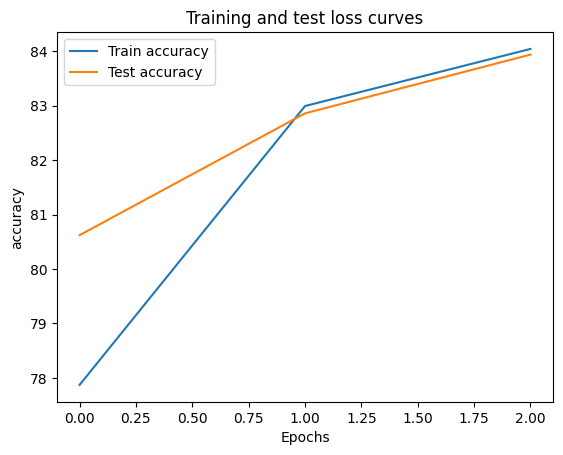

In [ ]:

from tqdm.auto import tqdm
epochs=3
Train_loss_list=[]
Train_acc_list=[]
Test_loss_list=[]
Test_acc_list=[]
epoch_count=[]
start_timer=timer()
for epoch in tqdm(range(epochs)):
    epoch_count.append(epoch)
    train_loss, train_acc=trainingLoop(model_0, train_dataloader,loss_fn,optimizer)
    Train_loss_list.append(train_loss.item())
    Train_acc_list.append(train_acc)
    test_loss, test_acc=testingLoop(model_0,test_dataloader,loss_fn)
    Test_loss_list.append(test_loss.item())
    Test_acc_list.append(test_acc)

end_timer=timer()
print_train_time(start_timer, end_timer, device)

plt.plot(epoch_count, Train_acc_list, label="Train accuracy")
plt.plot(epoch_count, Test_acc_list, label="Test accuracy")
plt.title("Training and test loss curves")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:

from torch import nn
class FashionMNISTModelV1(nn.Module):
      def __init__(self,input, output, hidden_units):
          super().__init__()
          self.block_1=nn.Sequential(
                                     nn.Conv2d(input,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2)
                                     )

          self.block_2=nn.Sequential(
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2)
                                     )


          self.flat_layer=nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*7*7, out_features=output)
                                        )
      def forward(self, x):
          x=self.block_1(x)
          #print(x.shape)
          x=self.block_2(x)
          #print(x.shape)
          x=self.flat_layer(x)
          #print(x.shape)
          return x

In [ ]:
model_1=FashionMNISTModelV1(1,10,10)
model_1

FashionMNISTModelV1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flat_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.647 | training accuracy: 76.57%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.414 | testing accuracy: 85.24%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.351 | training accuracy: 87.26%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.363 | testing accuracy: 87.38%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.316 | training accuracy: 88.50%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9

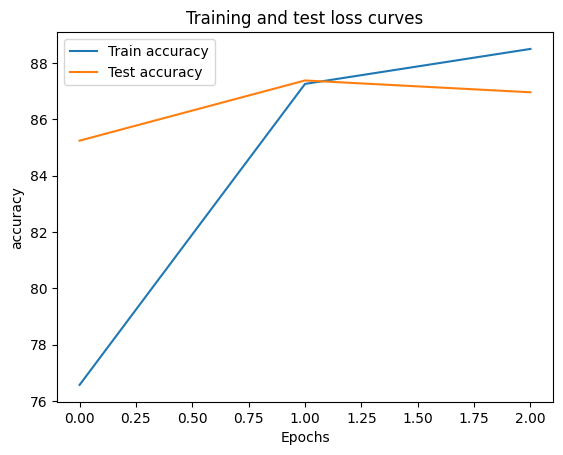

In [ ]:
from tqdm.auto import tqdm
epochs=3
Train_loss_list=[]
Train_acc_list=[]
Test_loss_list=[]
Test_acc_list=[]
epoch_count=[]
start_timer=timer()
for epoch in tqdm(range(epochs)):
    epoch_count.append(epoch)
    train_loss, train_acc=trainingLoop(model_1, train_dataloader,loss_fn,optimizer)
    Train_loss_list.append(train_loss.item())
    Train_acc_list.append(train_acc)
    test_loss, test_acc=testingLoop(model_1,test_dataloader,loss_fn)
    Test_loss_list.append(test_loss.item())
    Test_acc_list.append(test_acc)

end_timer=timer()
print_train_time(start_timer, end_timer, device)

plt.plot(epoch_count, Train_acc_list, label="Train accuracy")
plt.plot(epoch_count, Test_acc_list, label="Test accuracy")
plt.title("Training and test loss curves")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
def make_predictions(model, data_list):
    model.to(device)
    model.eval()
    result=[]
    with torch.inference_mode():
         for sample in data_list:
             sample=torch.unsqueeze(sample,dim=0).to(device)
             y_logits=model(sample)
             y_preds=torch.softmax(y_logits.squeeze(),dim=0)
             result.append(y_preds.cpu())
    return torch.stack(result)

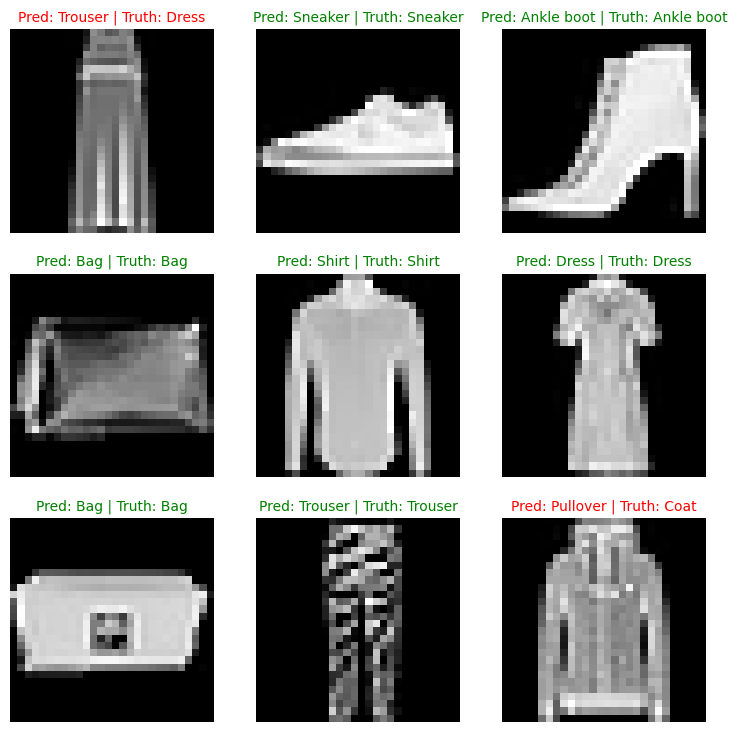

In [ ]:

import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

pred_probs= make_predictions(model_1,test_samples)

pred_classes=pred_probs.argmax(dim=1)

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
train_data=datasets.MNIST(root="data",train=True,download=True, transform=ToTensor(),target_transform=None)


test_data=datasets.MNIST(root="data",train=False, download=True,transform=ToTensor())

100%|██████████| 9912422/9912422 [00:00<00:00, 165517629.34it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 34433113.65it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 43043806.27it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 3639069.49it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



(-0.5, 27.5, 27.5, -0.5)

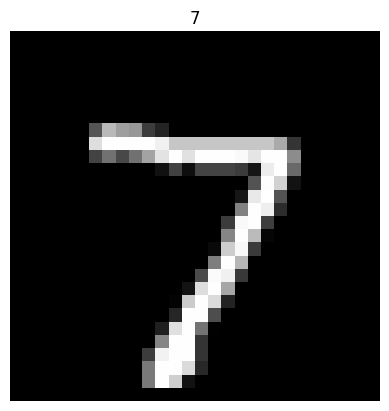

In [ ]:
image, label=test_data[0]
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)
plt.axis(False)

In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE=32 #hyperparameter
train_dataloader=DataLoader(train_data,BATCH_SIZE, shuffle=True)

test_dataloader=DataLoader(test_data,BATCH_SIZE, shuffle=False)

In [ ]:
from torch import nn
class MNISTModel(nn.Module):
      def __init__(self,input, output, hidden_units):
          super().__init__()
          self.block_1=nn.Sequential(
                                     nn.Conv2d(input,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2)
                                     )

          self.block_2=nn.Sequential(
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.Conv2d(hidden_units,hidden_units,kernel_size=3,padding=1,stride=1),
                                     nn.ReLU(),
                                     nn.MaxPool2d(2)
                                     )


          self.flat_layer=nn.Sequential(
                                        nn.Flatten(),
                                        nn.Linear(in_features=hidden_units*7*7, out_features=output)
                                        )
      def forward(self, x):
          x=self.block_1(x)
          #print(x.shape)
          x=self.block_2(x)
          #print(x.shape)
          x=self.flat_layer(x)
          #print(x.shape)
          return x

In [ ]:
model_2=MNISTModel(1,10,10)
model_2

MNISTModel(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (flat_layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

  0%|          | 0/3 [00:00<?, ?it/s]

Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.252 | training accuracy: 91.84%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.089 | testing accuracy: 97.27%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.071 | training accuracy: 97.78%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9600/10000 samples
testing loss: 0.055 | testing accuracy: 98.31%
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
training loss: 0.055 | training accuracy: 98.31%
Looked at 0/10000 samples
Looked at 3200/10000 samples
Looked at 6400/10000 samples
Looked at 9

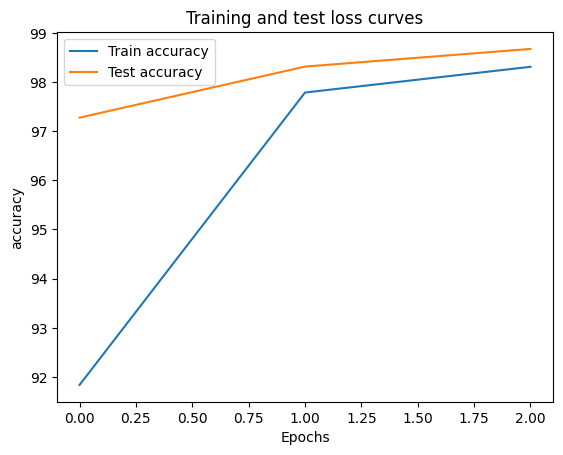

In [ ]:
from tqdm.auto import tqdm
epochs=3
Train_loss_list=[]
Train_acc_list=[]
Test_loss_list=[]
Test_acc_list=[]
epoch_count=[]
start_timer=timer()
for epoch in tqdm(range(epochs)):
    epoch_count.append(epoch)
    train_loss, train_acc=trainingLoop(model_2, train_dataloader,loss_fn,optimizer)
    Train_loss_list.append(train_loss.item())
    Train_acc_list.append(train_acc)
    test_loss, test_acc=testingLoop(model_2,test_dataloader,loss_fn)
    Test_loss_list.append(test_loss.item())
    Test_acc_list.append(test_acc)

end_timer=timer()
print_train_time(start_timer, end_timer, device)

plt.plot(epoch_count, Train_acc_list, label="Train accuracy")
plt.plot(epoch_count, Test_acc_list, label="Test accuracy")
plt.title("Training and test loss curves")
plt.ylabel("accuracy")
plt.xlabel("Epochs")
plt.legend();

In [ ]:
class_names = train_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

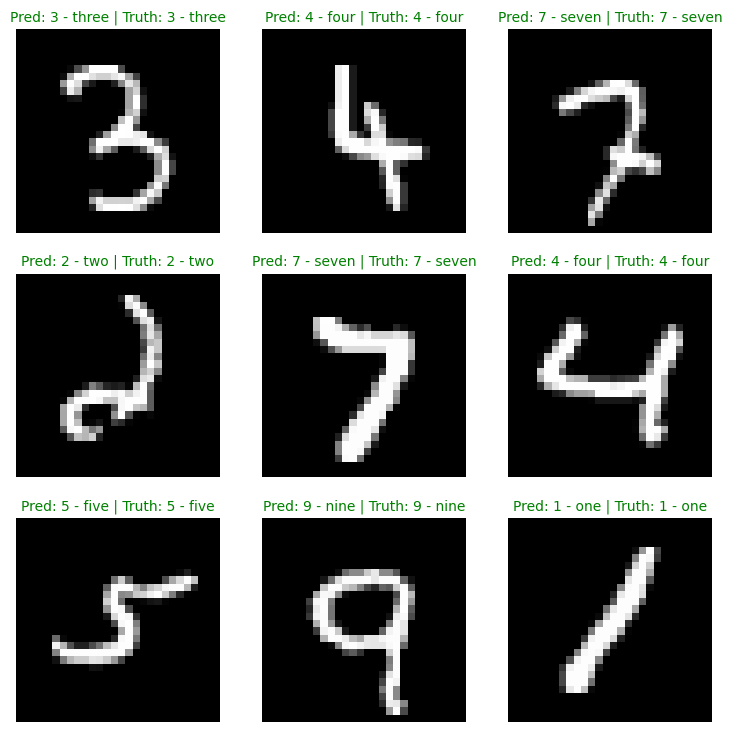

In [ ]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

pred_probs= make_predictions(model_2,test_samples)

pred_classes=pred_probs.argmax(dim=1)

plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap="gray")

  pred_label = class_names[pred_classes[i]]

  truth_label = class_names[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);